<a href="https://colab.research.google.com/github/thanaprondtn/bsc_dpdm24/blob/main/HW3_Data_Reduced_Marketbasket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# โหลดข้อมูล

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/bsc_dpdm24_data'

Mounted at /content/drive


In [ ]:
rmb = pd.read_csv(os.path.join(path,'reduced_marketbasket.csv'),encoding='latin-1')

In [ ]:
rmb

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France


# Clean data

## แยก Country ออกมาเป็นแต่ละทวีป

In [ ]:
print(rmb['Country'].unique())

['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Saudi Arabia' 'Czech Republic' 'Canada'
 'Unspecified' 'Brazil' 'USA' 'European Community' 'Bahrain' 'Malta' 'RSA']


In [ ]:
# สร้างฟังก์ชันเพื่อกำหนดทวีป
def assign_continent(country):
    europe = ['United Kingdom', 'France', 'Netherlands', 'Germany', 'Norway', 'EIRE',
              'Switzerland', 'Spain', 'Poland', 'Portugal', 'Italy', 'Belgium', 'Lithuania',
              'Iceland', 'Channel Islands', 'Denmark', 'Sweden', 'Austria', 'Finland', 'Greece',
              'Cyprus', 'Malta', 'Czech Republic', 'European Community']
    asia = ['Japan', 'Israel', 'Bahrain', 'Hong Kong', 'Singapore', 'Lebanon',
            'United Arab Emirates', 'Saudi Arabia']
    north_america = ['Canada', 'USA']
    south_america = ['Brazil']
    oceania = ['Australia']
    africa = ['RSA']
    special = ['Unspecified']

    if country in europe:
        return 'Europe'
    elif country in asia:
        return 'Asia'
    elif country in north_america:
        return 'North America'
    elif country in south_america:
        return 'South America'
    elif country in oceania:
        return 'Oceania'
    elif country in africa:
        return 'Africa'
    elif country in special:
        return 'Special'
    else:
        return 'Unknown'

# เพิ่มคอลัมน์ Continent
rmb['Continent'] = rmb['Country'].apply(assign_continent)
rmb

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Continent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom,Europe
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,Europe
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom,Europe
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,Europe
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,Europe
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France,Europe
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France,Europe
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France,Europe
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France,Europe


In [ ]:
continent_counts = rmb['Continent'].value_counts()
continent_counts

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
Continent,
Europe,403817
Oceania,1259
Asia,977
North America,442
Special,244
Africa,58
South America,32


In [ ]:
# Drop rows with null values in 'CustomerID' column
rmb = rmb.dropna(subset=['CustomerID'])

# Convert 'CustomerID' to intege                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             r, removing decimal points
rmb['CustomerID'] = rmb['CustomerID'].astype(int)

# Calculate sales for Europe
rmb['Sales'] = rmb['Quantity'] * rmb['UnitPrice']

# prompt: InvoiceDate แยกเวลาและวันที่ออกจากกัน
# Assuming 'InvoiceDate' is a datetime column. If not, convert it first:
rmb['InvoiceDate'] = pd.to_datetime(rmb['InvoiceDate'])

# Extract date and time into separate columns
rmb['Date'] = rmb['InvoiceDate'].dt.date
rmb['Time'] = rmb['InvoiceDate'].dt.time

# prompt: แบ่งtimeเป็น 3 ช่วง

# Function to categorize time into three periods
def categorize_time(time):
    if pd.Timestamp(time).time() >= pd.Timestamp('06:00:00').time() and pd.Timestamp(time).time() < pd.Timestamp('12:00:00').time():
        return 'Morning'
    elif pd.Timestamp(time).time() >= pd.Timestamp('12:00:00').time() and pd.Timestamp(time).time() < pd.Timestamp('18:00:00').time():
        return 'Afternoon'
    else:
        return 'Evening'

# Apply the function to create a new 'TimePeriod' column
rmb['TimePeriod'] = rmb['InvoiceDate'].apply(categorize_time)
rmb

<ipython-input-15-e0e1e6193e79>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rmb['CustomerID'] = rmb['CustomerID'].astype(int)
<ipython-input-15-e0e1e6193e79>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rmb['Sales'] = rmb['Quantity'] * rmb['UnitPrice']
<ipython-input-15-e0e1e6193e79>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Continent,Sales,Date,Time,TimePeriod
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,Europe,15.30,2010-12-01,08:26:00,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Europe,20.34,2010-12-01,08:26:00,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,Europe,22.00,2010-12-01,08:26:00,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Europe,20.34,2010-12-01,08:26:00,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Europe,20.34,2010-12-01,08:26:00,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,Europe,10.20,2011-12-09,12:50:00,Afternoon
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,Europe,12.60,2011-12-09,12:50:00,Afternoon
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,Europe,16.60,2011-12-09,12:50:00,Afternoon
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,Europe,16.60,2011-12-09,12:50:00,Afternoon


# ข้อ 1 วิเคราะห์พฤติกรรมผู้บริโภค (groupby customer id) แต่ละทวีป

## 1.1 ทวีปที่มียอดขายรวมสูงสุด




In [ ]:
# Calculate sales by country
sales_by_continent = rmb.groupby('Continent')['Sales'].sum().sort_values(ascending=False)

# Get the top countries by sales
top_continent = sales_by_continent
top_continent

,Sales
Continent,
Europe,8097047.274
Oceania,137077.270
Asia,55730.990
North America,5397.300
Special,2667.070
South America,1143.600
Africa,1002.310


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


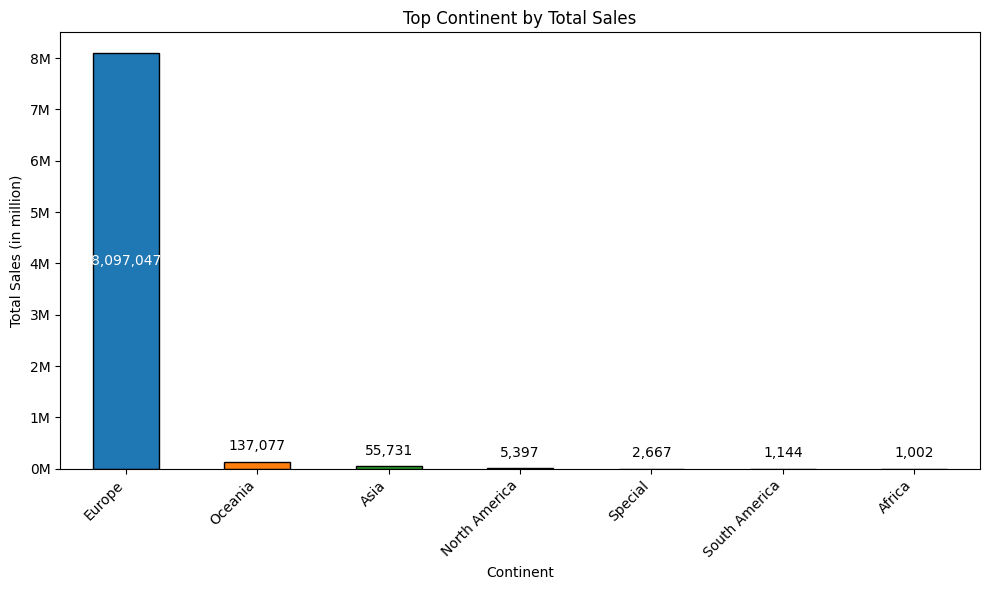

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# ตัวอย่างข้อมูล (สมมติว่า top_continent เป็น DataFrame หรือ Series)
# top_continent = ...

plt.figure(figsize=(10, 6))  # ปรับขนาดของกราฟ

# กำหนดสีสำหรับแท่งกราฟแต่ละอัน
colors = plt.cm.tab10(range(len(top_continent)))  # ใช้ colormap tab10

# สร้างกราฟแท่ง
bars = top_continent.plot(kind='bar', color=colors, edgecolor='black')

# เพิ่มตัวเลขในแท่งกราฟ
for i, value in enumerate(top_continent):
    if i == 0:  # สำหรับแท่งกราฟแรก
        plt.text(i, value / 2,  # วางข้อความตรงกลางแท่งกราฟ
                 f'{value:,.0f}',  # แสดงตัวเลขพร้อมใส่เครื่องหมาย ,
                 ha='center', va='center', fontsize=10, color='white')  # ตัวหนังสือสีขาว
    else:  # สำหรับแท่งกราฟอื่น ๆ
        plt.text(i, value + (max(top_continent) * 0.02),  # วางข้อความด้านบนของแท่งกราฟ
                 f'{value:,.0f}',  # แสดงตัวเลขพร้อมใส่เครื่องหมาย ,
                 ha='center', va='bottom', fontsize=10, color='black')  # ตัวหนังสือสีดำ

# ตั้งค่าชื่อกราฟและแกน
plt.title('Top Continent by Total Sales')
plt.xlabel('Continent')
plt.ylabel('Total Sales (in million)')

# ปรับแกน Y ให้แสดงหน่วยเป็นล้าน
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x*1e-6:,.0f}M'))

plt.xticks(rotation=45, ha='right')  # หมุนชื่อแกน x
plt.tight_layout()  # ปรับ layout ให้เหมาะสม

plt.show()

## 1.2 รายการสินค้าขายดีที่สุด

### จากทุกทวีป

In [ ]:
# prompt: นับ value counts ของ Description
print(len(rmb["Description"]))

# นับ value counts ของ Description
descriptions = rmb['Description'].value_counts()
descriptions
descriptions = rmb['Description'].value_counts()
descriptions

406829


,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,2070
REGENCY CAKESTAND 3 TIER,1905
JUMBO BAG RED RETROSPOT,1662
ASSORTED COLOUR BIRD ORNAMENT,1418
PARTY BUNTING,1416
...,...
ANTIQUE RASPBERRY FLOWER EARRINGS,1
"WALL ART,ONLY ONE PERSON",1
GOLD/AMBER DROP EARRINGS W LEAF,1


### Europe




In [ ]:
# Assuming 'rmb' DataFrame is already loaded and processed as in the provided code
europe_description_counts = rmb[rmb['Continent'] == 'Europe']['Description'].value_counts()

# Calculate the total number of unique descriptions in Europe
total_europe_descriptions = len(europe_description_counts)
print(f"\nจำนวนรายการสินค้าทั้งหมดในทวีป Europe: {total_europe_descriptions}")
europe_products = rmb[rmb['Continent'] == 'Europe']['Description'].value_counts()
europe_products


จำนวนรายการสินค้าทั้งหมดในทวีป Europe: 3896


,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,2065
REGENCY CAKESTAND 3 TIER,1885
JUMBO BAG RED RETROSPOT,1652
ASSORTED COLOUR BIRD ORNAMENT,1414
PARTY BUNTING,1401
...,...
INCENSE BAZAAR PEACH,1
FLOWER FAIRY 5 SUMMER DRAW LINERS,1
"WALL ART , THE MAGIC FOREST",1


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


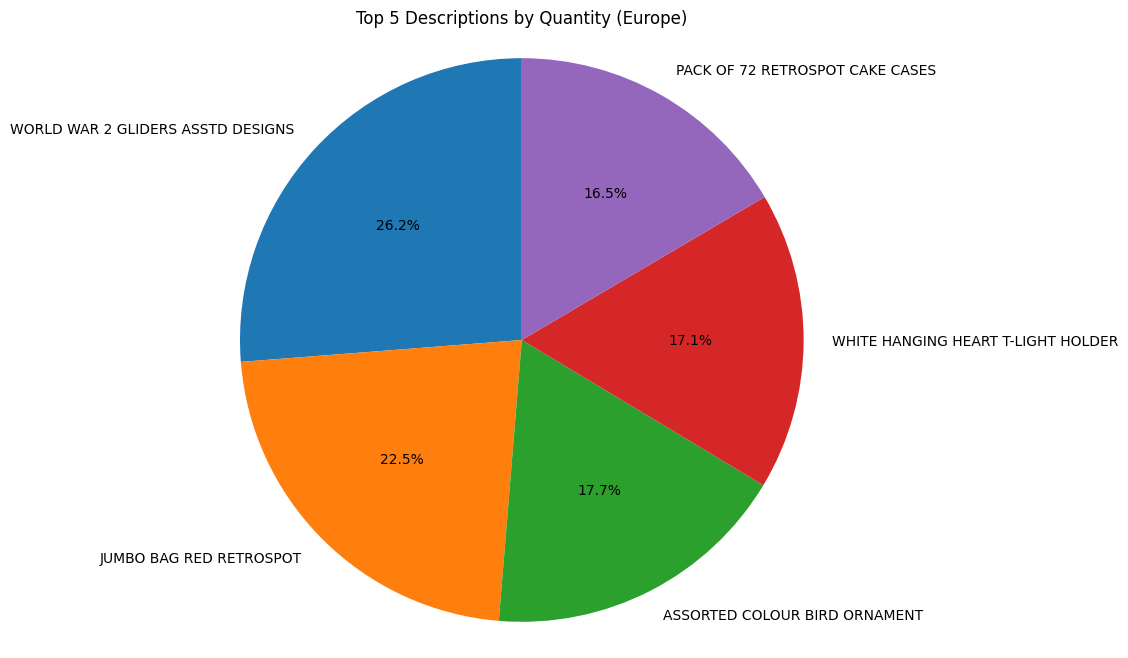

In [ ]:
# Assuming 'rmb' DataFrame is already loaded and processed as in the provided code
europe_df = rmb[rmb['Continent'] == 'Europe']
top_5_descriptions = europe_df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 8))
plt.pie(top_5_descriptions, labels=top_5_descriptions.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Descriptions by Quantity (Europe)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Oceania

In [ ]:
# Assuming 'rmb' DataFrame is already loaded and processed as in the provided code
oceania_description_counts = rmb[rmb['Continent'] == 'Oceania']['Description'].value_counts()

# Calculate the total number of unique descriptions in Oceania
total_oceania_descriptions = len(oceania_description_counts)
print(f"\nจำนวนรายการสินค้าทั้งหมดในทวีป Oceania: {total_oceania_descriptions}")
oceania_products = rmb[rmb['Continent'] == 'Oceania']['Description'].value_counts()
oceania_products


จำนวนรายการสินค้าทั้งหมดในทวีป Oceania: 609


,count
Description,
SET OF 3 CAKE TINS PANTRY DESIGN,10
LUNCH BAG RED RETROSPOT,9
RED TOADSTOOL LED NIGHT LIGHT,9
PAPER BUNTING RETROSPOT,8
BAKING SET 9 PIECE RETROSPOT,8
...,...
TOMATO CHARLIE+LOLA COASTER SET,1
CHARLIE & LOLA WASTEPAPER BIN FLORA,1
RECYCLED ACAPULCO MAT RED,1


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


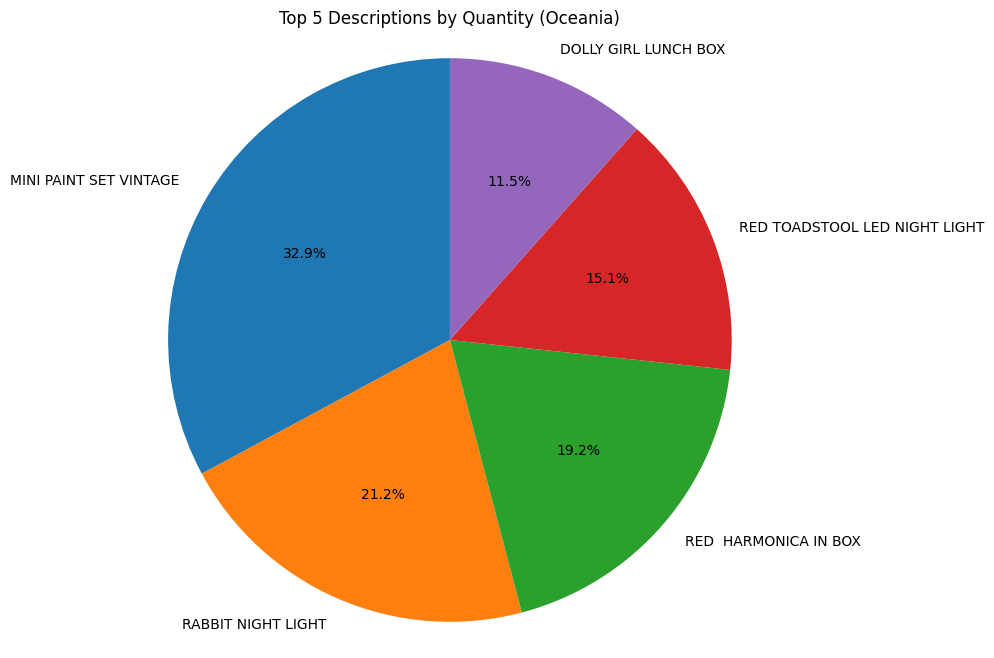

In [ ]:
# Assuming 'rmb' DataFrame is already loaded and processed as in the provided code

europe_df = rmb[rmb['Continent'] == 'Oceania']
top_5_descriptions = europe_df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 8))
plt.pie(top_5_descriptions, labels=top_5_descriptions.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Descriptions by Quantity (Oceania)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### North America

In [ ]:
# Assuming 'rmb' DataFrame is already loaded and processed as in the provided code
north_america_description_counts = rmb[rmb['Continent'] == 'North America']['Description'].value_counts()

# Calculate the total number of unique descriptions in North America
total_north_america_descriptions = len(north_america_description_counts)
print(f"\nจำนวนรายการสินค้าทั้งหมดในทวีป North America: {total_north_america_descriptions}")
north_america_products = rmb[rmb['Continent'] == 'North America']['Description'].value_counts()
north_america_products


จำนวนรายการสินค้าทั้งหมดในทวีป North America: 292


,count
Description,
TEA PARTY BIRTHDAY CARD,4
CARD DOLLY GIRL,4
SET OF 12 FAIRY CAKE BAKING CASES,4
SET/10 IVORY POLKADOT PARTY CANDLES,3
WRAP ENGLISH ROSE,3
...,...
NO JUNK MAIL METAL SIGN,1
12 PENCILS TALL TUBE POSY,1
HELLO SAILOR BLUE SOAP HOLDER,1


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


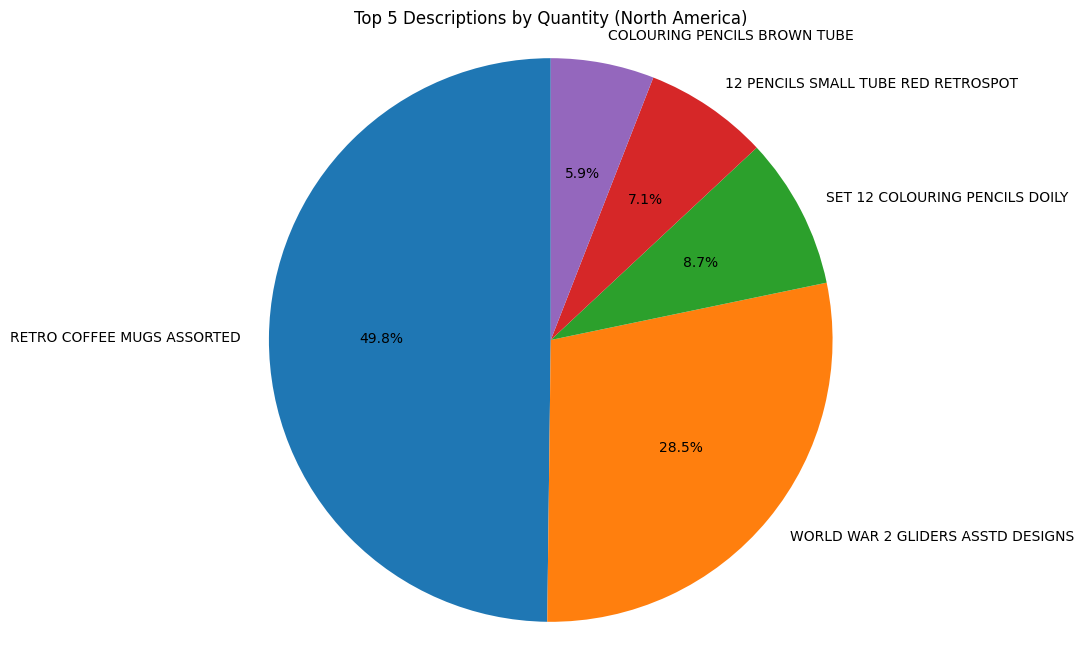

In [ ]:
# Assuming 'rmb' DataFrame is already loaded and processed as in the provided code

europe_df = rmb[rmb['Continent'] == 'North America']
top_5_descriptions = europe_df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 8))
plt.pie(top_5_descriptions, labels=top_5_descriptions.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Descriptions by Quantity (North America)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### South America

In [ ]:
# Assuming 'rmb' DataFrame is already loaded and processed as in the provided code
south_america_description_counts = rmb[rmb['Continent'] == 'South America']['Description'].value_counts()

# Calculate the total number of unique descriptions in South America
total_south_america_descriptions = len(south_america_description_counts)
print(f"\nจำนวนรายการสินค้าทั้งหมดในทวีป South America: {total_south_america_descriptions}")
south_america_products = rmb[rmb['Continent'] == 'South America']['Description'].value_counts()
south_america_products


จำนวนรายการสินค้าทั้งหมดในทวีป South America: 32


,count
Description,
REGENCY CAKESTAND 3 TIER,1
ROSES REGENCY TEACUP AND SAUCER,1
RECYCLED ACAPULCO MAT TURQUOISE,1
RECYCLED ACAPULCO MAT RED,1
RECYCLED ACAPULCO MAT BLUE,1
RECYCLED ACAPULCO MAT GREEN,1
RECYCLED ACAPULCO MAT PINK,1
RECYCLED ACAPULCO MAT LAVENDER,1
SMALL HEART FLOWERS HOOK,1


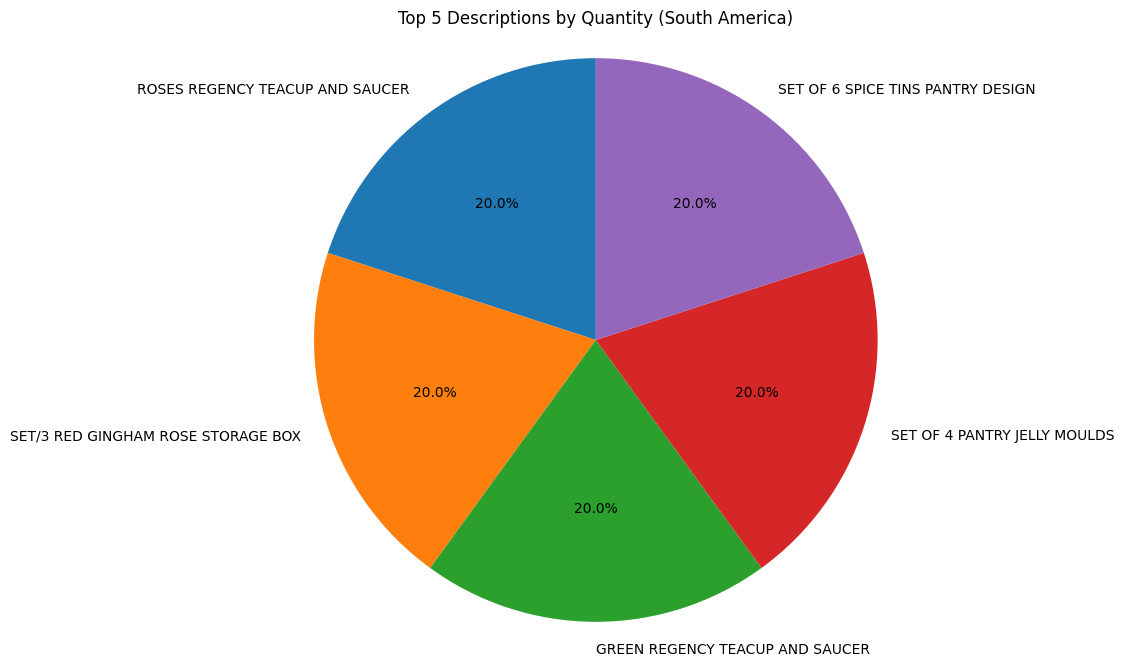

In [ ]:
# Assuming 'rmb' DataFrame is already loaded and processed as in the provided code

europe_df = rmb[rmb['Continent'] == 'South America']
top_5_descriptions = europe_df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 8))
plt.pie(top_5_descriptions, labels=top_5_descriptions.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Descriptions by Quantity (South America)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Africa

In [ ]:
# Assuming 'rmb' DataFrame is already loaded and processed as in the provided code
africa_description_counts = rmb[rmb['Continent'] == 'Africa']['Description'].value_counts()

# Calculate the total number of unique descriptions in Africa
total_africa_descriptions = len(africa_description_counts)
print(f"\nจำนวนรายการสินค้าทั้งหมดในทวีป Africa: {total_africa_descriptions}")
africa_products = rmb[rmb['Continent'] == 'Africa']['Description'].value_counts()
africa_products


จำนวนรายการสินค้าทั้งหมดในทวีป Africa: 58


,count
Description,
RED RETROSPOT CUP,1
RED RETROSPOT PLATE,1
CLASSIC METAL BIRDCAGE PLANT HOLDER,1
CREAM SWEETHEART MINI CHEST,1
SET OF 2 TRAYS HOME SWEET HOME,1
CARD HOLDER LOVE BIRD SMALL,1
DOORMAT KEEP CALM AND COME IN,1
ALARM CLOCK BAKELIKE RED,1
IVORY KITCHEN SCALES,1


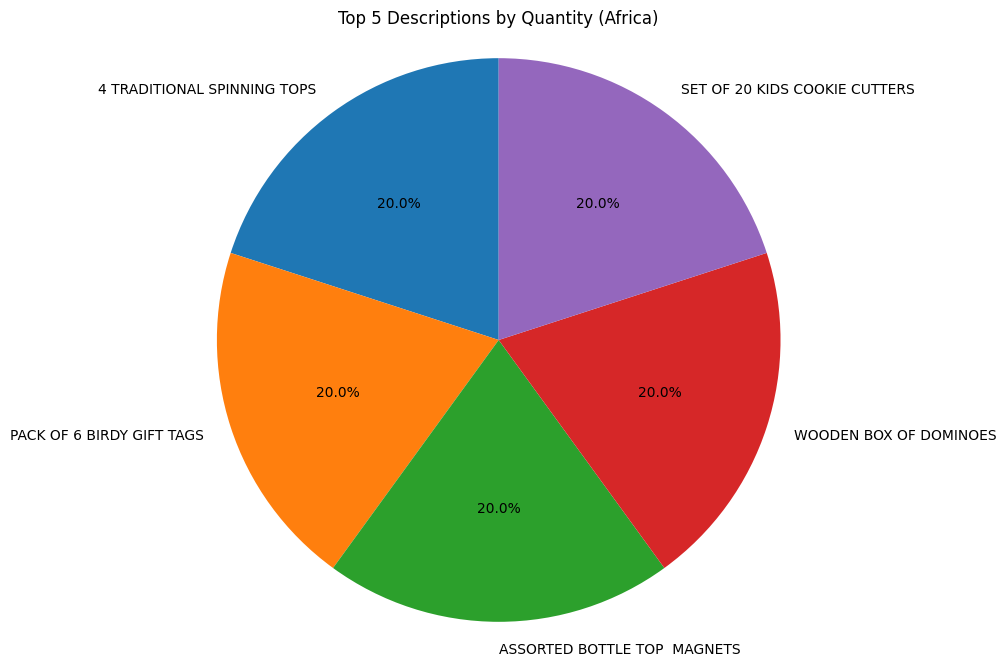

In [ ]:
# Assuming 'rmb' DataFrame is already loaded and processed as in the provided code

europe_df = rmb[rmb['Continent'] == 'Africa']
top_5_descriptions = europe_df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 8))
plt.pie(top_5_descriptions, labels=top_5_descriptions.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Descriptions by Quantity (Africa)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Special

In [ ]:
# Assuming 'rmb' DataFrame is already loaded and processed as in the provided code
special_description_counts = rmb[rmb['Continent'] == 'Special']['Description'].value_counts()

# Calculate the total number of unique descriptions in Special
total_special_descriptions = len(special_description_counts)
print(f"\nจำนวนรายการสินค้าทั้งหมดในทวีป Special: {total_special_descriptions}")
special_products = rmb[rmb['Continent'] == 'Special']['Description'].value_counts()
special_products


จำนวนรายการสินค้าทั้งหมดในทวีป Special: 213


,count
Description,
COSY HOUR CIGAR BOX MATCHES,3
ASSORTED COLOUR BIRD ORNAMENT,3
SET OF 10 LED DOLLY LIGHTS,3
FAIRY CAKE FLANNEL ASSORTED COLOUR,2
REGENCY CAKESTAND 3 TIER,2
...,...
BLUE SCANDINAVIAN PAISLEY WRAP,1
PINK PAISLEY ROSE GIFT WRAP,1
WRAP WEDDING DAY,1


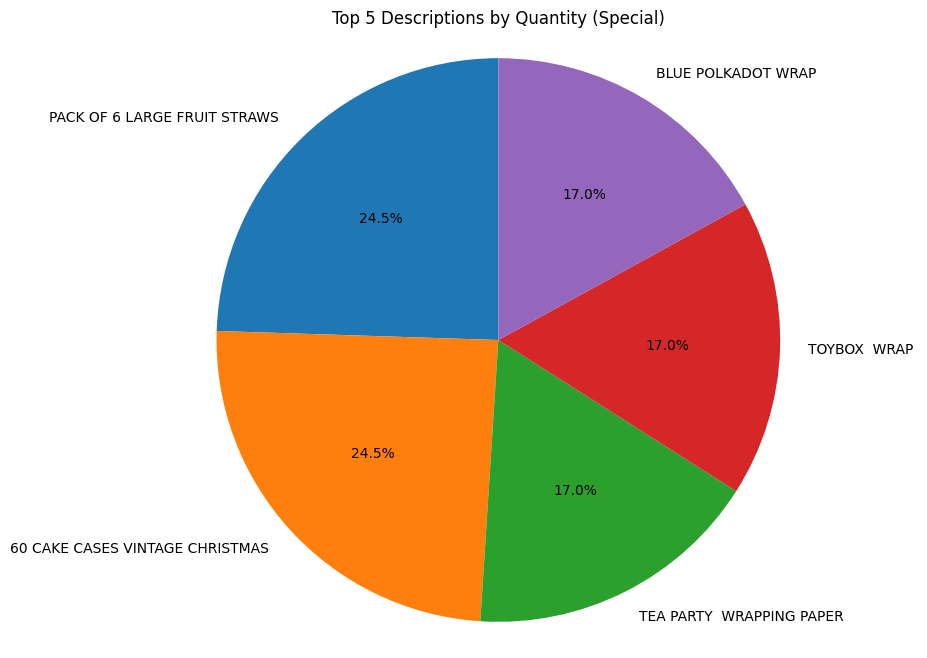

In [ ]:
# Assuming 'rmb' DataFrame is already loaded and processed as in the provided code

europe_df = rmb[rmb['Continent'] == 'Special']
top_5_descriptions = europe_df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 8))
plt.pie(top_5_descriptions, labels=top_5_descriptions.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Descriptions by Quantity (Special)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
# prompt: top 3 ของ description ที่มี quantity มากสุดจากทั้งหมด

# Display the top 3 descriptions with the highest quantity
top_3_products = rmb.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(3)
top_3_products

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
JUMBO BAG RED RETROSPOT,45066
ASSORTED COLOUR BIRD ORNAMENT,35314


<ipython-input-79-e852684f3358>:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(3, 'Quantity'))
<ipython-input-79-e852684f3358>:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for i, (continent, group) in enumerate(top_3_descriptions.groupby('Continent', sort=False)):


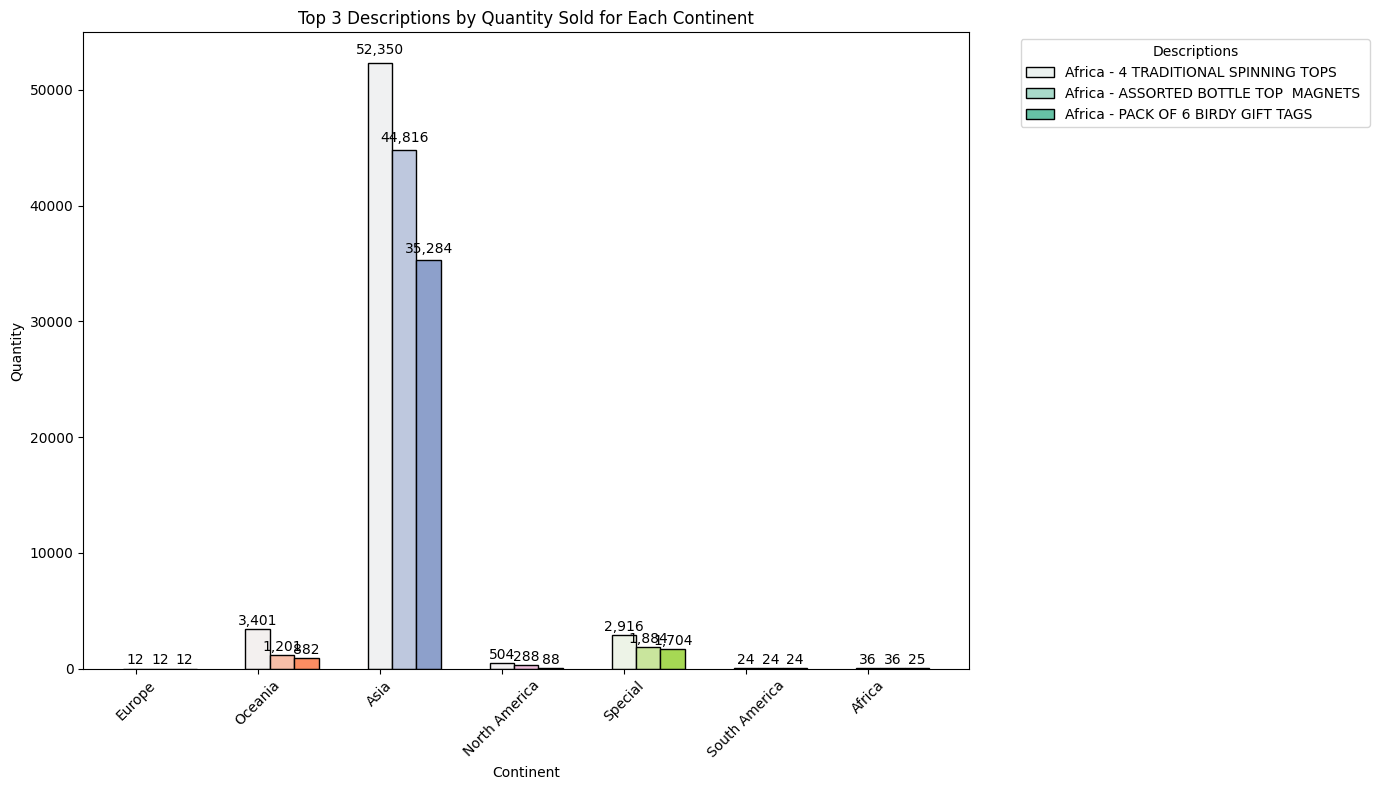

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'rmb' DataFrame is already loaded and processed
# Group by Continent and Description, then sum Quantity
continent_description_sales = rmb.groupby(['Continent', 'Description'])['Quantity'].sum().reset_index()

# Find the top 3 descriptions for each continent
top_3_descriptions = (
    continent_description_sales.groupby('Continent')
    .apply(lambda x: x.nlargest(3, 'Quantity'))
    .reset_index(drop=True)
)

# Sort continents by total quantity for better visualization
sorted_continents = top_3_descriptions.groupby('Continent')['Quantity'].sum().sort_values(ascending=False).index
top_3_descriptions['Continent'] = pd.Categorical(top_3_descriptions['Continent'], categories=sorted_continents)

# Set up the figure
plt.figure(figsize=(14, 8))

# Define a color palette for continents
continent_colors = sns.color_palette("Set2", len(sorted_continents))

# Plot grouped bar chart
bar_width = 0.2
x_positions = range(len(sorted_continents))

for i, (continent, group) in enumerate(top_3_descriptions.groupby('Continent', sort=False)):
    description_colors = sns.light_palette(continent_colors[i], n_colors=len(group))  # Shades for descriptions
    for j, (index, row) in enumerate(group.iterrows()):
        plt.bar(
            [i + bar_width * j],  # Adjusted x-position for each description
            row['Quantity'],
            width=bar_width,
            color=description_colors[j % len(description_colors)],
            edgecolor='black',
            label=f"{continent} - {row['Description']}" if i == 0 else ""
        )
        # Add value text on top of each bar
        plt.text(
            i + bar_width * j,
            row['Quantity'] + max(row['Quantity'] * 0.01, 100),
            f"{int(row['Quantity']):,}",
            ha='center',
            va='bottom',
            fontsize=10,
            color='black'
        )

# Set axis labels and title
plt.xlabel("Continent")
plt.ylabel("Quantity")
plt.title("Top 3 Descriptions by Quantity Sold for Each Continent")

# Customize x-axis with continent names
plt.xticks(x_positions, sorted_continents, rotation=45)

# Adjust legend to prevent overlapping
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title="Descriptions", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()

## ประเทศที่มีจำนวนลูกค้ามากที่สุด

In [ ]:
customers_by_country = rmb.groupby('Continent')['CustomerID'].nunique().sort_values(ascending=False)
customers_by_country

,CustomerID
Continent,
Europe,4332
Asia,19
Oceania,9
North America,8
Special,4
Africa,1
South America,1


## แสดง

### Europe

In [ ]:
europe_rmb = rmb[rmb['Continent'] == 'Europe']
europe_rmb

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Continent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850,United Kingdom,Europe
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850,United Kingdom,Europe
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850,United Kingdom,Europe
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850,United Kingdom,Europe
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850,United Kingdom,Europe
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680,France,Europe
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680,France,Europe
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680,France,Europe
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680,France,Europe


In [ ]:
# prompt: europe_rmb คำนวณยอดขาย(๊UnitPrice) จาก Desription ที่นับออกมาแล้วเอาไปคูณกับ Quantity

# Calculate sales for Europe
europe_rmb['Sales'] = europe_rmb['Quantity'] * europe_rmb['UnitPrice']
europe_rmb

<ipython-input-38-2bd41f15bbfc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  europe_rmb['Sales'] = europe_rmb['Quantity'] * europe_rmb['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Continent,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850,United Kingdom,Europe,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850,United Kingdom,Europe,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850,United Kingdom,Europe,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850,United Kingdom,Europe,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850,United Kingdom,Europe,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680,France,Europe,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680,France,Europe,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680,France,Europe,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680,France,Europe,16.60


# ข้อ 1 วิเคราะห์พฤติกรรมการซื้อ

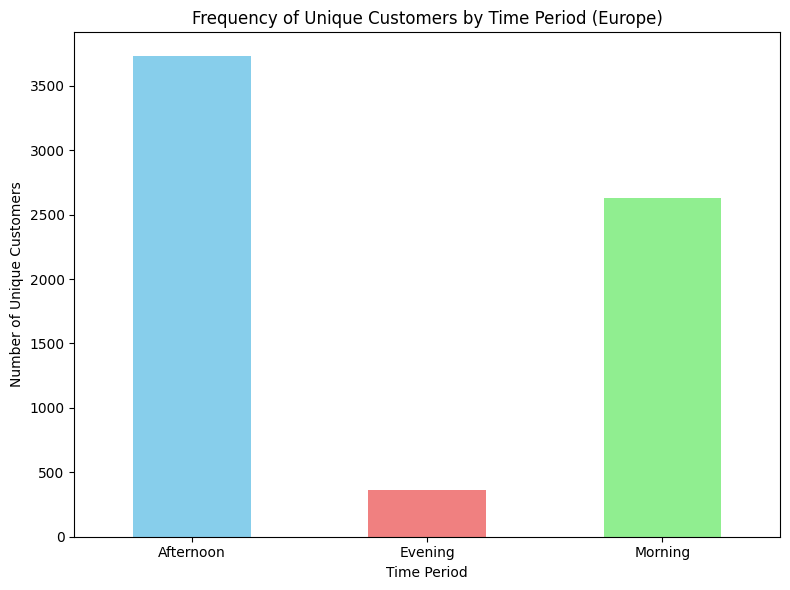

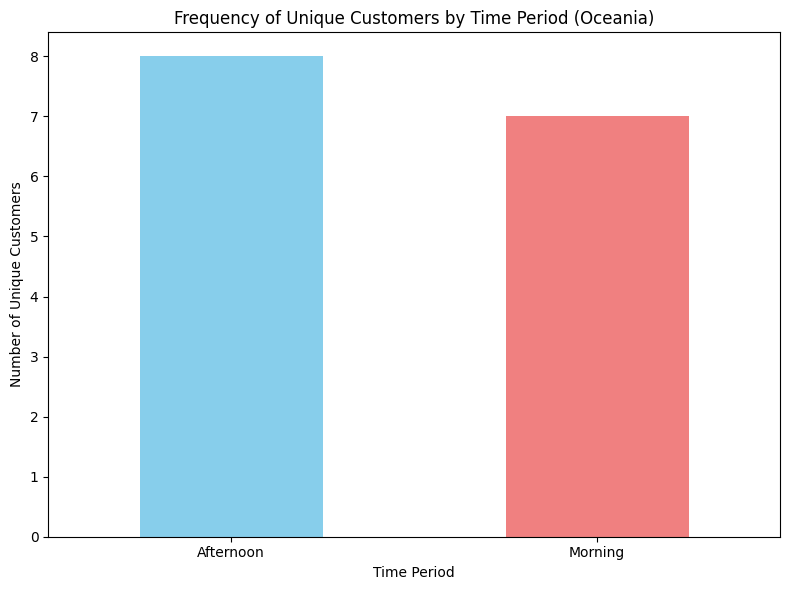

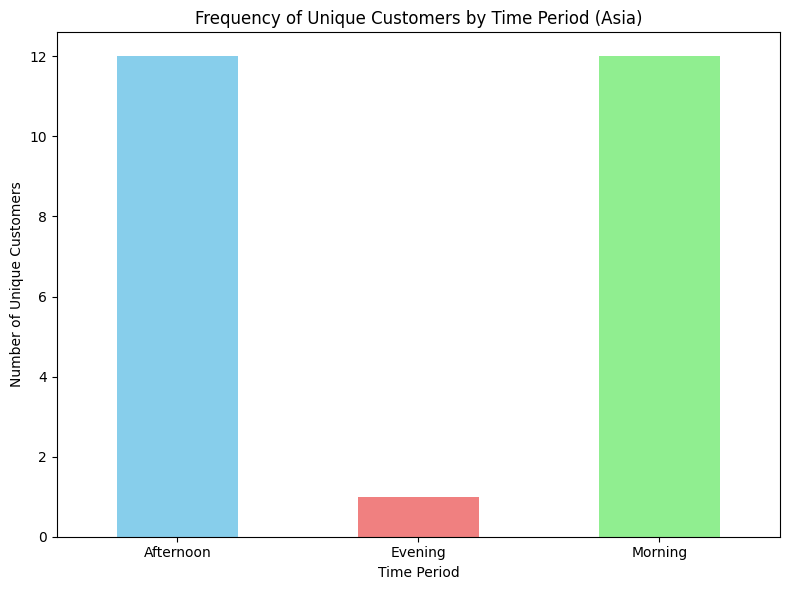

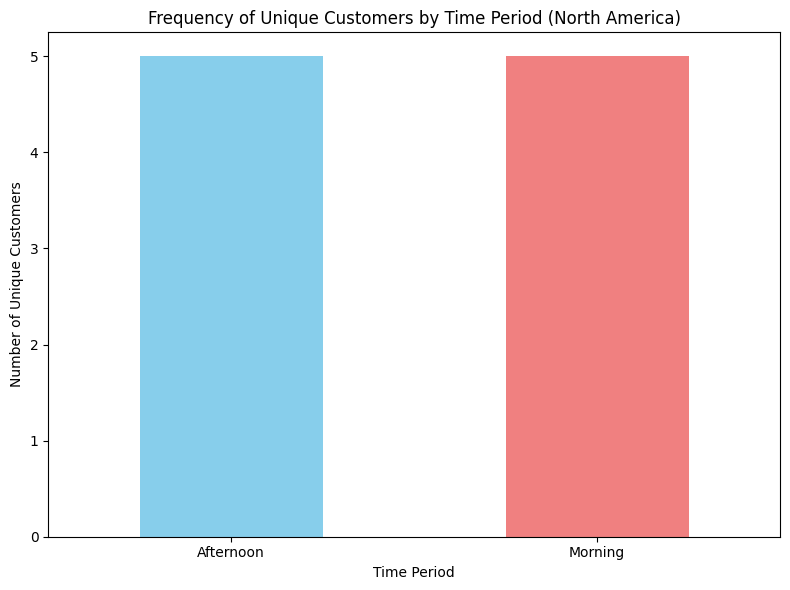

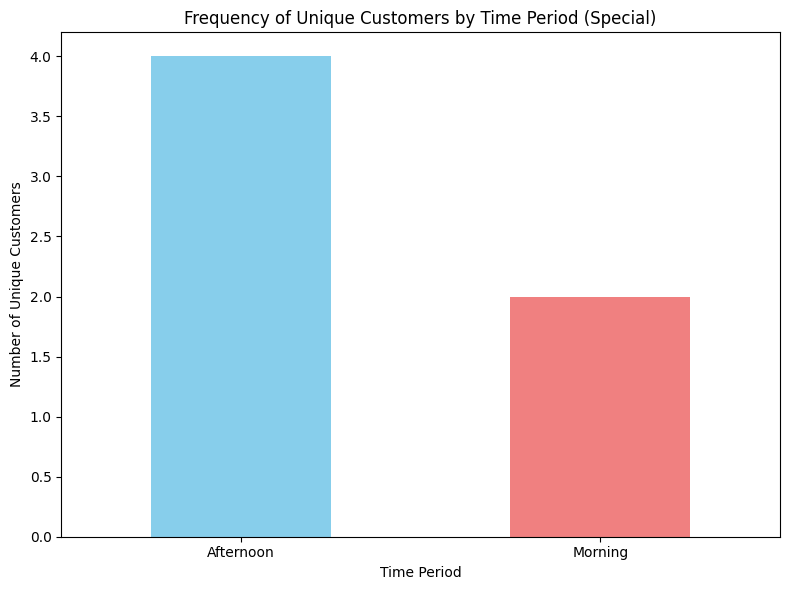

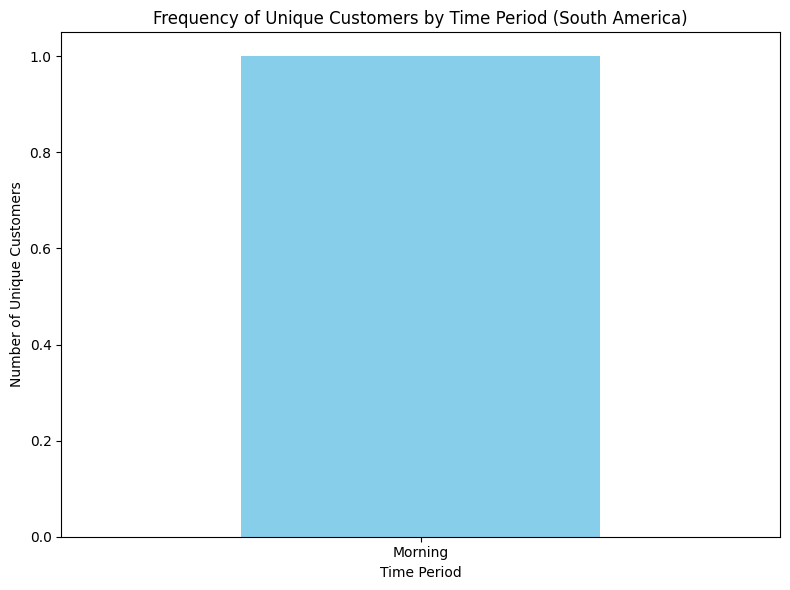

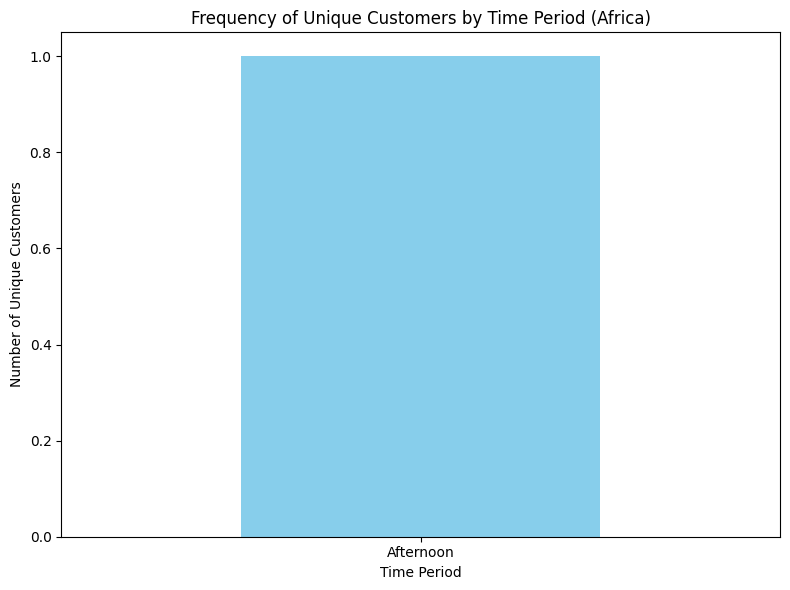

In [ ]:
# prompt: ทำกราฟความถี่ของจำนวน CustomerID ในแต่ละช่วงเวลา ที่แบ่งtimeเป็น 3 ช่วง ของแต่ละทวีป

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'rmb' DataFrame is already loaded and processed as in the provided code

continents = rmb['Continent'].unique()

for continent in continents:
    continent_data = rmb[rmb['Continent'] == continent]

    # Group data by 'TimePeriod' and count unique 'CustomerID'
    customer_counts = continent_data.groupby('TimePeriod')['CustomerID'].nunique()

    # Create the bar plot for the current continent
    plt.figure(figsize=(8, 6))
    customer_counts.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
    plt.title(f'Frequency of Unique Customers by Time Period ({continent})')
    plt.xlabel('Time Period')
    plt.ylabel('Number of Unique Customers')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Top 3 association rules for Morning:
Pair: ('ASSORTED MONKEY SUCTION CUP HOOK', 'BLACK MINI TAPE MEASURE '), Support: 0.0137, Confidence (A->B): 2.4000, Confidence (B->A): 9.0000, Lift: 1576.8000
Pair: ('ASSORTED MONKEY SUCTION CUP HOOK', 'POLYESTER FILLER PAD 30CMx30CM'), Support: 0.0137, Confidence (A->B): 2.4000, Confidence (B->A): 9.0000, Lift: 1576.8000
Pair: ('CARRIAGE', 'DOLLY GIRL MINI RUCKSACK'), Support: 0.0129, Confidence (A->B): 0.5862, Confidence (B->A): 34.0000, Lift: 1540.5517

Top 3 association rules for Afternoon:
Pair: ('CRUK Commission', 'DOTCOM POSTAGE'), Support: 0.0526, Confidence (A->B): 14.0000, Confidence (B->A): 14.0000, Lift: 3728.0000
Pair: ('CRUK Commission', 'CRYSTAL CZECH CROSS PHONE CHARM'), Support: 0.0113, Confidence (A->B): 3.0000, Confidence (B->A): 14.0000, Lift: 3728.0000
Pair: ('CRYSTAL CZECH CROSS PHONE CHARM', 'DOTCOM POSTAGE'), Support: 0.0113, Confidence (A->B): 14.0000, Confidence (B->A): 3.0000, Lift: 3728.0000

Top 3 association rules for 

# ข้อ 2 แสดงสินค้าที่ซื้อคู่กันของแต่ละทวีป

In [ ]:
def calculate_association_rules_by_timeperiod(df, continent='Europe', min_sup=0.01, min_con=0.5):
    from collections import Counter

    # Filter data for the specified continent
    continent_df = df[df['Continent'] == continent]

    # Initialize results dictionary for each time period
    results = {}

    # Loop through each Timeperiod
    for timeperiod in ['Morning', 'Afternoon', 'Evening']:
        # Filter data for the current time period
        timeperiod_df = continent_df[continent_df['TimePeriod'] == timeperiod]

        # Group by CustomerID and aggregate items into lists
        invoice_items = timeperiod_df.groupby('CustomerID')['Description'].apply(list).reset_index()

        # Count single items and item combinations
        item_counts = Counter()
        item_combinations = Counter()
        total_transactions = len(invoice_items)

        for items in invoice_items['Description']:
            # Count individual items
            item_counts.update(items)

            # Count item combinations
            for i in range(len(items)):
                for j in range(i + 1, len(items)):
                    pair = tuple(sorted((items[i], items[j])))
                    item_combinations[pair] += 1

        # Calculate Confidence and Lift for each pair
        rules = []
        for pair, pair_count in item_combinations.items():
            item_a, item_b = pair
            support_a = item_counts[item_a] / total_transactions
            support_b = item_counts[item_b] / total_transactions
            support_ab = pair_count / total_transactions
            confidence_a_to_b = support_ab / support_a
            confidence_b_to_a = support_ab / support_b
            lift = support_ab / (support_a * support_b)

            # Apply min_sup and min_con filters
            if support_ab >= min_sup and (confidence_a_to_b >= min_con or confidence_b_to_a >= min_con):
                rules.append({
                    'Pair': pair,
                    'Support': support_ab,
                    'Confidence (A->B)': confidence_a_to_b,
                    'Confidence (B->A)': confidence_b_to_a,
                    'Lift': lift
                })

        # Sort rules by Lift in descending order
        sorted_rules = sorted(rules, key=lambda x: x['Lift'], reverse=True)
        results[timeperiod] = sorted_rules[:3]  # Top 3 rules for each time period

    return results

# Assuming your DataFrame is named 'rmb'
association_rules = calculate_association_rules_by_timeperiod(rmb)

# Display results
for timeperiod, rules in association_rules.items():
    print(f"\nTop 3 association rules for {timeperiod}:")
    for rule in rules:
        print(
            f"Pair: {rule['Pair']}, "
            f"Support: {rule['Support']:.4f}, "
            f"Confidence (A->B): {rule['Confidence (A->B)']:.4f}, "
            f"Confidence (B->A): {rule['Confidence (B->A)']:.4f}, "
            f"Lift: {rule['Lift']:.4f}"
        )


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Top 3 association rules for Morning:
Pair: ('ASSORTED MONKEY SUCTION CUP HOOK', 'BLACK MINI TAPE MEASURE '), Support: 0.0137, Confidence (A->B): 2.4000, Confidence (B->A): 9.0000, Lift: 1576.8000
Pair: ('ASSORTED MONKEY SUCTION CUP HOOK', 'POLYESTER FILLER PAD 30CMx30CM'), Support: 0.0137, Confidence (A->B): 2.4000, Confidence (B->A): 9.0000, Lift: 1576.8000
Pair: ('CARRIAGE', 'DOLLY GIRL MINI RUCKSACK'), Support: 0.0129, Confidence (A->B): 0.5862, Confidence (B->A): 34.0000, Lift: 1540.5517

Top 3 association rules for Afternoon:
Pair: ('CRUK Commission', 'DOTCOM POSTAGE'), Support: 0.0526, Confidence (A->B): 14.0000, Confidence (B->A): 14.0000, Lift: 3728.0000
Pair: ('CRUK Commission', 'CRYSTAL CZECH CROSS PHONE CHARM'), Support: 0.0113, Confidence (A->B): 3.0000, Confidence (B->A): 14.0000, Lift: 3728.0000
Pair: ('CRYSTAL CZECH CROSS PHONE CHARM', 'DOTCOM POSTAGE'), Support: 0.0113, Confidence (A->B): 14.0000, Confidence (B->A): 3.0000, Lift: 3728.0000

Top 3 association rules for 

In [ ]:
# Assuming 'rmb' DataFrame is already loaded and processed as in the provided code

continent_counts = rmb['TimePeriod'].value_counts()
continent_counts

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
TimePeriod,
Afternoon,278430
Morning,120880
Evening,7519


# Top 3 most frequent item combinations

## Top 3 most frequent item combinations in Europe

In [ ]:
# prompt: ลูกค้าส่วนใหญ่ใน Continent  Europe นิยมซื้ออะไรพร้อมๆกันใน InvoiceNo บ้าง

from collections import Counter

def count_items_together(df, continent='Europe'):
    # Filter data for the specified continent
    continent_df = df[df['Continent'] == continent]

    # Group by InvoiceNo and aggregate items into lists
    invoice_items = continent_df.groupby('CustomerID')['Description'].apply(list).reset_index()

    # Count item combinations
    item_combinations = Counter()
    for items in invoice_items['Description']:
        for i in range(len(items)):
            for j in range(i+1, len(items)):
                pair = tuple(sorted((items[i], items[j])))
                item_combinations[pair] += 1

    return item_combinations.most_common(3) # Return top 3 combinations

# Assuming your DataFrame is named 'rmb'
top_combinations = count_items_together(rmb)

print("Top 3 most frequent item combinations in Europe:")
for combination, count in top_combinations:
  print(f"{combination}: {count}")

Top 3 most frequent item combinations in Europe:
('JUMBO BAG PINK POLKADOT', 'JUMBO BAG RED RETROSPOT'): 5413
('JUMBO BAG RED RETROSPOT', 'LUNCH BAG RED RETROSPOT'): 5333
('LUNCH BAG  BLACK SKULL.', 'LUNCH BAG RED RETROSPOT'): 5287


## Top 3 frequent item combination in Oceania



In [ ]:
# prompt: ลูกค้าส่วนใหญ่ใน Continent  Europe นิยมซื้ออะไรพร้อมๆกันใน InvoiceNo บ้าง

from collections import Counter

def count_items_together(df, continent='Oceania'):
    # Filter data for the specified continent
    continent_df = df[df['Continent'] == continent]

    # Group by InvoiceNo and aggregate items into lists
    invoice_items = continent_df.groupby('CustomerID')['Description'].apply(list).reset_index()

    # Count item combinations
    item_combinations = Counter()
    for items in invoice_items['Description']:
        for i in range(len(items)):
            for j in range(i+1, len(items)):
                pair = tuple(sorted((items[i], items[j])))
                item_combinations[pair] += 1

    return item_combinations.most_common(3) # Return top 3 combinations

# Assuming your DataFrame is named 'rmb'
top_combinations = count_items_together(rmb)

print("Top 3 most frequent item combinations in Oceania")
for combination, count in top_combinations:
  print(f"{combination}: {count}")

Top 3 most frequent item combinations in Oceania
('MINI PAINT SET VINTAGE ', 'ROSES REGENCY TEACUP AND SAUCER '): 38
('MINI PAINT SET VINTAGE ', 'SET OF 3 CAKE TINS PANTRY DESIGN '): 36
('DOLLY GIRL LUNCH BOX', 'MINI PAINT SET VINTAGE '): 36


## Top 3 frequent item combination in Asia

In [ ]:
# prompt: ลูกค้าส่วนใหญ่ใน Continent  Europe นิยมซื้ออะไรพร้อมๆกันใน InvoiceNo บ้าง

from collections import Counter

def count_items_together(df, continent='Asia'):
    # Filter data for the specified continent
    continent_df = df[df['Continent'] == continent]

    # Group by InvoiceNo and aggregate items into lists
    invoice_items = continent_df.groupby('CustomerID')['Description'].apply(list).reset_index()

    # Count item combinations
    item_combinations = Counter()
    for items in invoice_items['Description']:
        for i in range(len(items)):
            for j in range(i+1, len(items)):
                pair = tuple(sorted((items[i], items[j])))
                item_combinations[pair] += 1

    return item_combinations.most_common(3) # Return top 3 combinations

# Assuming your DataFrame is named 'rmb'
top_combinations = count_items_together(rmb)

print("Top 3 most frequent item combinations in Asia")
for combination, count in top_combinations:
  print(f"{combination}: {count}")

Top 3 most frequent item combinations in Asia
('Manual', 'Manual'): 92
('Manual', 'PARTY PIZZA DISH RED RETROSPOT'): 56
('DOORMAT RED RETROSPOT', 'Manual'): 42


## Top 3 frequent item combination in North America

In [ ]:
# prompt: ลูกค้าส่วนใหญ่ใน Continent  Europe นิยมซื้ออะไรพร้อมๆกันใน InvoiceNo บ้าง

from collections import Counter

def count_items_together(df, continent='North America'):
    # Filter data for the specified continent
    continent_df = df[df['Continent'] == continent]

    # Group by InvoiceNo and aggregate items into lists
    invoice_items = continent_df.groupby('CustomerID')['Description'].apply(list).reset_index()

    # Count item combinations
    item_combinations = Counter()
    for items in invoice_items['Description']:
        for i in range(len(items)):
            for j in range(i+1, len(items)):
                pair = tuple(sorted((items[i], items[j])))
                item_combinations[pair] += 1

    return item_combinations.most_common(3) # Return top 3 combinations

# Assuming your DataFrame is named 'rmb'
top_combinations = count_items_together(rmb)

print("Top 3 most frequent item combinations in North America")
for combination, count in top_combinations:
  print(f"{combination}: {count}")

Top 3 most frequent item combinations in North America
('CARD DOLLY GIRL ', 'TEA PARTY BIRTHDAY CARD'): 8
('BUNDLE OF 3 ALPHABET EXERCISE BOOKS', 'COLOURING PENCILS BROWN TUBE'): 6
('BUNDLE OF 3 SCHOOL EXERCISE BOOKS  ', 'COLOURING PENCILS BROWN TUBE'): 6


## Top 3 frequent item combination in Special

In [ ]:
# prompt: ลูกค้าส่วนใหญ่ใน Continent  Europe นิยมซื้ออะไรพร้อมๆกันใน InvoiceNo บ้าง

from collections import Counter

def count_items_together(df, continent='Special'):
    # Filter data for the specified continent
    continent_df = df[df['Continent'] == continent]

    # Group by InvoiceNo and aggregate items into lists
    invoice_items = continent_df.groupby('CustomerID')['Description'].apply(list).reset_index()

    # Count item combinations
    item_combinations = Counter()
    for items in invoice_items['Description']:
        for i in range(len(items)):
            for j in range(i+1, len(items)):
                pair = tuple(sorted((items[i], items[j])))
                item_combinations[pair] += 1

    return item_combinations.most_common(3) # Return top 3 combinations

# Assuming your DataFrame is named 'rmb'
top_combinations = count_items_together(rmb)

print("Top 3 most frequent item combinations in Special")
for combination, count in top_combinations:
  print(f"{combination}: {count}")

Top 3 most frequent item combinations in Special
('3D SHEET OF DOG STICKERS', 'COSY HOUR CIGAR BOX MATCHES '): 6
('COSY HOUR CIGAR BOX MATCHES ', 'WHITE ROCKING HORSE HAND PAINTED'): 6
('ASSORTED COLOUR BIRD ORNAMENT', 'COSY HOUR CIGAR BOX MATCHES '): 6


In [ ]:
continent_counts = rmb['Continent'].value_counts()
continent_counts

,count
Continent,
Europe,403817
Oceania,1259
Asia,977
North America,442
Special,244
Africa,58
South America,32


## Top 3 frequent item combination in Africa

In [ ]:
# prompt: ลูกค้าส่วนใหญ่ใน Continent  Europe นิยมซื้ออะไรพร้อมๆกันใน InvoiceNo บ้าง

from collections import Counter

def count_items_together(df, continent='Africa'):
    # Filter data for the specified continent
    continent_df = df[df['Continent'] == continent]

    # Group by InvoiceNo and aggregate items into lists
    invoice_items = continent_df.groupby('CustomerID')['Description'].apply(list).reset_index()

    # Count item combinations
    item_combinations = Counter()
    for items in invoice_items['Description']:
        for i in range(len(items)):
            for j in range(i+1, len(items)):
                pair = tuple(sorted((items[i], items[j])))
                item_combinations[pair] += 1

    return item_combinations.most_common(3) # Return top 3 combinations

# Assuming your DataFrame is named 'rmb'
top_combinations = count_items_together(rmb)

print("Top 3 most frequent item combinations in Africa")
for combination, count in top_combinations:
  print(f"{combination}: {count}")

Top 3 most frequent item combinations in Africa
('PINK  POLKADOT PLATE ', 'RED RETROSPOT CUP'): 1
('RED RETROSPOT CUP', 'SET OF 4 KNICK KNACK TINS DOILY '): 1
('LUNCH BAG VINTAGE DOILY ', 'RED RETROSPOT CUP'): 1


## Top 3 frequent item combination in South America

In [ ]:
# prompt: ลูกค้าส่วนใหญ่ใน Continent  Europe นิยมซื้ออะไรพร้อมๆกันใน InvoiceNo บ้าง

from collections import Counter

def count_items_together(df, continent='South America'):
    # Filter data for the specified continent
    continent_df = df[df['Continent'] == continent]

    # Group by InvoiceNo and aggregate items into lists
    invoice_items = continent_df.groupby('CustomerID')['Description'].apply(list).reset_index()

    # Count item combinations
    item_combinations = Counter()
    for items in invoice_items['Description']:
        for i in range(len(items)):
            for j in range(i+1, len(items)):
                pair = tuple(sorted((items[i], items[j])))
                item_combinations[pair] += 1

    return item_combinations.most_common(3) # Return top 3 combinations

# Assuming your DataFrame is named 'rmb'
top_combinations = count_items_together(rmb)

print("Top 3 most frequent item combinations in South America")
for combination, count in top_combinations:
  print(f"{combination}: {count}")

Top 3 most frequent item combinations in South America
('REGENCY CAKESTAND 3 TIER', 'ROSES REGENCY TEACUP AND SAUCER '): 1
('GREEN REGENCY TEACUP AND SAUCER', 'REGENCY CAKESTAND 3 TIER'): 1
('PINK REGENCY TEACUP AND SAUCER', 'REGENCY CAKESTAND 3 TIER'): 1


# จะหา association rules ของทวีป Europe โดยแบ่งเป็น 3 ช่วงเวลาตาม TimesPeriod

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
TimePeriod,
Afternoon,278430
Morning,120880
Evening,7519


In [ ]:
# prompt: ลูกค้าส่วนใหญ่ใน Continent  Europe นิยมซื้ออะไรพร้อมๆกันใน InvoiceNo บ้าง

from collections import Counter

def count_items_together(df, continent='Europe'):
    # Filter data for the specified continent
    continent_df = df[df['Continent'] == continent]

    # Group by InvoiceNo and aggregate items into lists
    invoice_items = continent_df.groupby('CustomerID')['Description'].apply(list).reset_index()

    # Count item combinations
    item_combinations = Counter()
    for items in invoice_items['Description']:
        for i in range(len(items)):
            for j in range(i+1, len(items)):
                pair = tuple(sorted((items[i], items[j])))
                item_combinations[pair] += 1

    return item_combinations.most_common(3) # Return top 3 combinations

# Assuming your DataFrame is named 'rmb'
top_combinations = count_items_together(rmb)

print("Top 3 most frequent item combinations in Europe:")
for combination, count in top_combinations:
  print(f"{combination}: {count}")

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top 3 most frequent item combinations in Europe:
('JUMBO BAG PINK POLKADOT', 'JUMBO BAG RED RETROSPOT'): 5413
('JUMBO BAG RED RETROSPOT', 'LUNCH BAG RED RETROSPOT'): 5333
('LUNCH BAG  BLACK SKULL.', 'LUNCH BAG RED RETROSPOT'): 5287


In [ ]:
from collections import Counter

def count_items_by_timeperiod(df, continent='Europe'):
    # Filter data for the specified continent
    continent_df = df[df['Continent'] == continent]

    # Initialize a dictionary to store results for each time period
    results = {}

    # Loop through each Timeperiod
    for timeperiod in ['Morning', 'Afternoon', 'Evening']:
        # Filter data for the current time period
        timeperiod_df = continent_df[continent_df['TimePeriod'] == timeperiod]

        # Group by InvoiceNo and aggregate items into lists
        invoice_items = timeperiod_df.groupby('CustomerID')['Description'].apply(list).reset_index()

        # Count item combinations
        item_combinations = Counter()
        for items in invoice_items['Description']:
            for i in range(len(items)):
                for j in range(i + 1, len(items)):
                    pair = tuple(sorted((items[i], items[j])))
                    item_combinations[pair] += 1

        # Store the top 3 combinations for the current time period
        results[timeperiod] = item_combinations.most_common(3)

    return results

# Assuming your DataFrame is named 'rmb'
top_combinations_by_timeperiod = count_items_by_timeperiod(rmb)

# Display results
print("Top 3 most frequent item combinations in Europe by Timeperiod:")
for timeperiod, combinations in top_combinations_by_timeperiod.items():
    print(f"\n{timeperiod}:")
    for combination, count in combinations:
        print(f"  {combination}: {count}")


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top 3 most frequent item combinations in Europe by Timeperiod:

Morning:
  ('GREEN REGENCY TEACUP AND SAUCER', 'PINK REGENCY TEACUP AND SAUCER'): 1112
  ('JUMBO BAG PINK POLKADOT', 'JUMBO BAG RED RETROSPOT'): 952
  ('PINK REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER '): 880

Afternoon:
  ('LUNCH BAG  BLACK SKULL.', 'LUNCH BAG RED RETROSPOT'): 2587
  ('JUMBO BAG RED RETROSPOT', 'LUNCH BAG RED RETROSPOT'): 2565
  ('JUMBO BAG PINK POLKADOT', 'JUMBO BAG RED RETROSPOT'): 2435

Evening:
  ('LUNCH BAG  BLACK SKULL.', 'LUNCH BAG CARS BLUE'): 29
  ('GARDENERS KNEELING PAD CUP OF TEA ', 'GARDENERS KNEELING PAD KEEP CALM '): 26
  ('GREEN REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER '): 25


In [ ]:
from collections import Counter

def count_items_by_timeperiod_with_min_sup(df, continent='Europe', min_sup=0.01):
    # Filter data for the specified continent
    continent_df = df[df['Continent'] == continent]

    # Initialize a dictionary to store results for each time period
    results = {}

    # Loop through each Timeperiod
    for timeperiod in ['Morning', 'Afternoon', 'Evening']:
        # Filter data for the current time period
        timeperiod_df = continent_df[continent_df['TimePeriod'] == timeperiod]

        # Group by CustomerID and aggregate items into lists
        invoice_items = timeperiod_df.groupby('CustomerID')['Description'].apply(list).reset_index()

        # Count item combinations
        item_combinations = Counter()
        for items in invoice_items['Description']:
            for i in range(len(items)):
                for j in range(i + 1, len(items)):
                    pair = tuple(sorted((items[i], items[j])))
                    item_combinations[pair] += 1

        # Calculate total transactions for the time period
        total_transactions = len(invoice_items)

        # Calculate Support for each pair and filter by min_sup
        filtered_combinations = {
            pair: count
            for pair, count in item_combinations.items()
            if count / total_transactions >= min_sup
        }

        # Sort the filtered pairs by count and keep the top 3
        sorted_combinations = sorted(filtered_combinations.items(), key=lambda x: x[1], reverse=True)[:3]

        # Store the top combinations for the current time period
        results[timeperiod] = sorted_combinations

    return results

# Assuming your DataFrame is named 'rmb'
min_sup = 0.01  # Example: Minimum Support threshold (2%)
top_combinations_by_timeperiod = count_items_by_timeperiod_with_min_sup(rmb, min_sup=min_sup)

# Display results
print(f"Top 3 most frequent item combinations in Europe by Timeperiod (min_sup = {min_sup}):")
for timeperiod, combinations in top_combinations_by_timeperiod.items():
    print(f"\n{timeperiod}:")
    for combination, count in combinations:
        print(f"  {combination}: {count}")


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top 3 most frequent item combinations in Europe by Timeperiod (min_sup = 0.01):

Morning:
  ('GREEN REGENCY TEACUP AND SAUCER', 'PINK REGENCY TEACUP AND SAUCER'): 1112
  ('JUMBO BAG PINK POLKADOT', 'JUMBO BAG RED RETROSPOT'): 952
  ('PINK REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER '): 880

Afternoon:
  ('LUNCH BAG  BLACK SKULL.', 'LUNCH BAG RED RETROSPOT'): 2587
  ('JUMBO BAG RED RETROSPOT', 'LUNCH BAG RED RETROSPOT'): 2565
  ('JUMBO BAG PINK POLKADOT', 'JUMBO BAG RED RETROSPOT'): 2435

Evening:
  ('LUNCH BAG  BLACK SKULL.', 'LUNCH BAG CARS BLUE'): 29
  ('GARDENERS KNEELING PAD CUP OF TEA ', 'GARDENERS KNEELING PAD KEEP CALM '): 26
  ('GREEN REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER '): 25


In [ ]:
def calculate_association_rules_by_timeperiod(df, continent='Europe'):
    from collections import Counter

    # Filter data for the specified continent
    continent_df = df[df['Continent'] == continent]

    # Initialize results dictionary for each time period
    results = {}

    # Loop through each Timeperiod
    for timeperiod in ['Morning', 'Afternoon', 'Evening']:
        # Filter data for the current time period
        timeperiod_df = continent_df[continent_df['TimePeriod'] == timeperiod]

        # Group by CustomerID and aggregate items into lists
        invoice_items = timeperiod_df.groupby('CustomerID')['Description'].apply(list).reset_index()

        # Count single items and item combinations
        item_counts = Counter()
        item_combinations = Counter()
        total_transactions = len(invoice_items)

        for items in invoice_items['Description']:
            # Count individual items
            item_counts.update(items)

            # Count item combinations
            for i in range(len(items)):
                for j in range(i + 1, len(items)):
                    pair = tuple(sorted((items[i], items[j])))
                    item_combinations[pair] += 1

        # Calculate Confidence and Lift for each pair
        rules = []
        for pair, pair_count in item_combinations.items():
            item_a, item_b = pair
            support_a = item_counts[item_a] / total_transactions
            support_b = item_counts[item_b] / total_transactions
            support_ab = pair_count / total_transactions
            confidence_a_to_b = support_ab / support_a
            confidence_b_to_a = support_ab / support_b
            lift = support_ab / (support_a * support_b)

            rules.append({
                'Pair': pair,
                'Support': support_ab,
                'Confidence (A->B)': confidence_a_to_b,
                'Confidence (B->A)': confidence_b_to_a,
                'Lift': lift
            })

        # Sort rules by Lift in descending order
        sorted_rules = sorted(rules, key=lambda x: x['Lift'], reverse=True)
        results[timeperiod] = sorted_rules[:3]  # Top 3 rules for each time period

    return results

# Assuming your DataFrame is named 'rmb'
association_rules = calculate_association_rules_by_timeperiod(rmb)

# Display results
for timeperiod, rules in association_rules.items():
    print(f"\nTop 3 association rules for {timeperiod}:")
    for rule in rules:
        print(
            f"Pair: {rule['Pair']}, "
            f"Support: {rule['Support']:.4f}, "
            f"Confidence (A->B): {rule['Confidence (A->B)']:.4f}, "
            f"Confidence (B->A): {rule['Confidence (B->A)']:.4f}, "
            f"Lift: {rule['Lift']:.4f}"
        )


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Top 3 association rules for Morning:
Pair: ('BIRTHDAY BANNER TAPE', 'HOT WATER BOTTLE BABUSHKA LARGE'), Support: 0.0004, Confidence (A->B): 1.0000, Confidence (B->A): 1.0000, Lift: 2628.0000
Pair: ('FLOWER GLASS GARLD NECKL36"AMETHYST', 'PINK ROSEBUD PEARL BRACELET'), Support: 0.0004, Confidence (A->B): 1.0000, Confidence (B->A): 1.0000, Lift: 2628.0000
Pair: ("NEW BAROQUE B'FLY NECKLACE RED", 'PINK ROSEBUD PEARL BRACELET'), Support: 0.0004, Confidence (A->B): 1.0000, Confidence (B->A): 1.0000, Lift: 2628.0000

Top 3 association rules for Afternoon:
Pair: ('GLASS BEAD HOOP NECKLACE GREEN', "NEW BAROQUE B'FLY NECKLACE CRYSTAL"), Support: 0.0003, Confidence (A->B): 1.0000, Confidence (B->A): 1.0000, Lift: 3728.0000
Pair: ("NEW BAROQUE B'FLY NECKLACE CRYSTAL", "NEW BAROQUE B'FLY NECKLACE GREEN"), Support: 0.0003, Confidence (A->B): 1.0000, Confidence (B->A): 1.0000, Lift: 3728.0000
Pair: ('GLASS BEAD HOOP NECKLACE MONTANA', "NEW BAROQUE B'FLY NECKLACE CRYSTAL"), Support: 0.0003, Confiden

In [ ]:
def calculate_association_rules_from_frequent_pairs(df, continent='Europe', min_sup=0.5):
    from collections import Counter

    # Filter data for the specified continent
    continent_df = df[df['Continent'] == continent]

    # Initialize results dictionary for each time period
    results = {}

    # Loop through each Timeperiod
    for timeperiod in ['Morning', 'Afternoon', 'Evening']:
        # Filter data for the current time period
        timeperiod_df = continent_df[continent_df['TimePeriod'] == timeperiod]

        # Group by CustomerID and aggregate items into lists
        invoice_items = timeperiod_df.groupby('CustomerID')['Description'].apply(list).reset_index()

        # Count item combinations (pairs of items)
        item_combinations = Counter()
        item_counts = Counter()
        total_transactions = len(invoice_items)

        for items in invoice_items['Description']:
            for i in range(len(items)):
                for j in range(i + 1, len(items)):
                    pair = tuple(sorted((items[i], items[j])))
                    item_combinations[pair] += 1
                    item_counts[items[i]] += 1
                    item_counts[items[j]] += 1

        # Select top 3 most frequent pairs based on frequency
        top_3_pairs = item_combinations.most_common(3)

        # Calculate Support, Confidence, and Lift for each pair
        rules = []
        for pair, pair_count in top_3_pairs:
            item_a, item_b = pair
            support_ab = pair_count / total_transactions
            support_a = item_counts[item_a] / total_transactions
            support_b = item_counts[item_b] / total_transactions
            confidence_a_to_b = support_ab / support_a
            confidence_b_to_a = support_ab / support_b
            lift = support_ab / (support_a * support_b)

            # Apply min_sup filter
            if support_ab >= min_sup:
                rules.append({
                    'Pair': pair,
                    'Support': support_ab,
                    'Confidence (A->B)': confidence_a_to_b,
                    'Confidence (B->A)': confidence_b_to_a,
                    'Lift': lift
                })

        # Sort rules by Lift in descending order
        sorted_rules = sorted(rules, key=lambda x: x['Lift'], reverse=True)
        results[timeperiod] = sorted_rules  # Store the rules for this time period

    return results

# Assuming your DataFrame is named 'rmb'
association_rules = calculate_association_rules_from_frequent_pairs(rmb, min_sup=0.5)

# Display results
for timeperiod, rules in association_rules.items():
    print(f"\nAssociation rules for {timeperiod}:")
    for rule in rules:
        print(
            f"Pair: {rule['Pair']}, "
            f"Support: {rule['Support']:.4f}, "
            f"Confidence (A->B): {rule['Confidence (A->B)']:.4f}, "
            f"Confidence (B->A): {rule['Confidence (B->A)']:.4f}, "
            f"Lift: {rule['Lift']:.4f}"
        )


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Association rules for Morning:

Association rules for Afternoon:
Pair: ('JUMBO BAG PINK POLKADOT', 'JUMBO BAG RED RETROSPOT'), Support: 0.6532, Confidence (A->B): 0.0084, Confidence (B->A): 0.0052, Lift: 0.0001
Pair: ('LUNCH BAG  BLACK SKULL.', 'LUNCH BAG RED RETROSPOT'), Support: 0.6939, Confidence (A->B): 0.0059, Confidence (B->A): 0.0056, Lift: 0.0000
Pair: ('JUMBO BAG RED RETROSPOT', 'LUNCH BAG RED RETROSPOT'), Support: 0.6880, Confidence (A->B): 0.0055, Confidence (B->A): 0.0056, Lift: 0.0000

Association rules for Evening:
